# INSY 670 Group Project Part 2
Alice Liu, Diwei Zhu, Yingxin Jiang, Kexin Wang, Yichen Wang

# 1. Data Scraping and Preprocessing

## 1.1 Scraping from Twitter

Please do not run the following code, as it will take 1 day to execute. The output of scraped twitter is stored in csv.

In [2]:
#!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re

In [65]:
key_word = "Ice Bucket Challenge"  # Declare the key word used to search tweets
user_name = ""   # Declare a user name used to search tweets

july1 = '2014-07-01'  # Declare a end date
july1_ = '2014-07-02'  # Declare a end date
july2 = '2014-07-15'  # Declare a end date
july2_ = '2014-07-16'  # Declare a end date
july = [july1,july1_,july2,july2_]

august1 = '2014-08-01'  # Declare a end date
august1_ = '2014-08-02'  # Declare a end date
august2 = '2014-08-15'  # Declare a end date
august2_ = '2014-08-16'  # Declare a end date
august = [august1,august1_,august2,august2_]

sept1 = '2014-09-01'  # Declare a end date
sept1_ = '2014-09-02'  # Declare a end date
sept2 = '2014-09-15'  # Declare a end date
sept2_ = '2014-09-16'  # Declare a end date
sept = [sept1,sept1_,sept2,sept2_]

oct1 = '2014-10-01'  # Declare a end date
oct1_ = '2014-10-02'  # Declare a end date
oct2 = '2014-10-15'  # Declare a end date
oct2_ = '2014-10-16'  # Declare a end date
octo = [oct1,oct1_,oct2,oct2_]

nov1 = '2014-11-01'  # Declare a end date
nov1_ = '2014-11-02'  # Declare a end date
nov2 = '2014-11-15'  # Declare a end date
nov2_ = '2014-11-16'  # Declare a end date
nov = [nov1,nov1_,nov2,nov2_]

dec1 = '2014-12-01'  # Declare a end date
dec1_ = '2014-12-02'  # Declare a end date
dec2 = '2014-12-15'  # Declare a end date
dec2_ = '2014-12-16'  # Declare a end date
dec = [dec1,dec1_,dec2,dec2_]

month = [july,august,sept,octo,nov,dec]

count = 5000             # The maximum number of tweets
tweets_list_keyword = [] # A list used to store the returned results for keyword search
tweets_list_user = []    # A list used to store the retuned results for user search

In [66]:
# Define a string command for Scraper Api
for i in month:
    for j in range(2):
        command_keyword = key_word +' since:'+i[2*j]+' until:'+i[2*j+1]

        print("Scraping data for keyword IceBucketChallenge from",i[2*j],"to",i[2*j+1])

        for k,tweet in enumerate(sntwitter.TwitterSearchScraper(command_keyword).get_items()):
            tweets_list_keyword.append([tweet.date, tweet.user.username, tweet.content,tweet.mentionedUsers]) # Append returned results to list
            if k>count:
                k=0
                break;

Scraping data for keyword IceBucketChallenge from 2014-07-01 to 2014-07-02
Scraping data for keyword IceBucketChallenge from 2014-07-15 to 2014-07-16
Scraping data for keyword IceBucketChallenge from 2014-08-01 to 2014-08-02
Scraping data for keyword IceBucketChallenge from 2014-08-15 to 2014-08-16
Scraping data for keyword IceBucketChallenge from 2014-09-01 to 2014-09-02
Scraping data for keyword IceBucketChallenge from 2014-09-15 to 2014-09-16
Scraping data for keyword IceBucketChallenge from 2014-10-01 to 2014-10-02
Scraping data for keyword IceBucketChallenge from 2014-10-15 to 2014-10-16
Scraping data for keyword IceBucketChallenge from 2014-11-01 to 2014-11-02
Scraping data for keyword IceBucketChallenge from 2014-11-15 to 2014-11-16
Scraping data for keyword IceBucketChallenge from 2014-12-01 to 2014-12-02
Scraping data for keyword IceBucketChallenge from 2014-12-15 to 2014-12-16


In [67]:
# Create a dataframe from the tweets list above 
tweets_df_keyword = pd.DataFrame(tweets_list_keyword, columns=['date','username','Text','mentionedusers'])
tweets_df_keyword.to_csv("tweets_keywords.csv",index=False) # Export to a csv file
print("Scraped data have been exported to the csv file")

Scraped data have been exported to the csv file


## 1.2 User Mentioned Data

In [3]:
# load the tweets data we scrape
tweets = pd.read_csv('tweets_keywords.csv')

# select columns we need to work with
tweets = tweets[['username','mentionedusers']]

# drop null values, aka tweets with no interactions between users
#tweets = tweets.dropna()

# reset index from 0
tweets = tweets.reset_index()

# drop the index column
df = tweets[['username','mentionedusers']]

In [4]:
df

,username,mentionedusers
0,Steve_DiMeglio,"[User(username='Keegan_Bradley', id=225072440,..."
1,AmyOlsonGolf,NaN
2,eddiefoohc,NaN
3,stevenaumann,"[User(username='antoniovilla9', id=217621750, ..."
4,ChaseCYoung,"[User(username='CoachJoshBrewer', id=51467210,..."
...,...,...
24313,icebucket_chall,NaN
24314,PlayJarizm,"[User(username='SamuelLJackson', id=75974281, ..."
24315,Jingrassia,"[User(username='thetomzone', id=119756545, dis..."
24316,Muzik_Head_,NaN


In [5]:
import numpy as np
for i in range(len(df["username"])):
    string = "username="
    df["mentionedusers"]=df["mentionedusers"].replace(np.nan,string)

temp=[]
for i in range(len(df["username"])):
    temp_set = []
    temp_set.append(df["username"][i])
    temp_set.append(df["mentionedusers"][i])
    temp.append(temp_set)

for i in range(len(temp)):
    if temp[i][1]=="username=":
        temp_string ="username='"+temp[i][0]+"',"
        temp[i][1] = temp_string

C:\Users\DELL\AppData\Local\Temp/ipykernel_12572/2041125150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mentionedusers"]=df["mentionedusers"].replace(np.nan,string)


In [6]:
tweets = pd.DataFrame(temp,columns=["username","mentionedusers"])
tweets

,username,mentionedusers
0,Steve_DiMeglio,"[User(username='Keegan_Bradley', id=225072440,..."
1,AmyOlsonGolf,"username='AmyOlsonGolf',"
2,eddiefoohc,"username='eddiefoohc',"
3,stevenaumann,"[User(username='antoniovilla9', id=217621750, ..."
4,ChaseCYoung,"[User(username='CoachJoshBrewer', id=51467210,..."
...,...,...
24313,icebucket_chall,"username='icebucket_chall',"
24314,PlayJarizm,"[User(username='SamuelLJackson', id=75974281, ..."
24315,Jingrassia,"[User(username='thetomzone', id=119756545, dis..."
24316,Muzik_Head_,"username='Muzik_Head_',"


In [7]:
# calculate the number of mentioned users in a tweet
count = []
for i in range(tweets.shape[0]):
    value = tweets['mentionedusers'][i].count('username=')
    count.append(value)
tweets['#mentionedusers']=pd.Series(count)

In [8]:
# take a look at how many users are mentioned
tweets['#mentionedusers'].value_counts()

1    21773
2     1846
3      396
4      236
5       51
6        9
7        5
8        2
Name: #mentionedusers, dtype: int64

In [9]:
# cleaning mentionedusers column
for i in range(tweets.shape[0]):
    string = tweets['mentionedusers'][i]
    users = re.findall(r'username=\S+', string)
    tweets['mentionedusers'][i]=users

# extract usernames
for i in range(tweets.shape[0]):
    for j in range(len(tweets['mentionedusers'][i])):
        newstring = tweets['mentionedusers'][i][j]
        newstring = newstring[10:]
        newstring = newstring[:-2]
        tweets['mentionedusers'][i][j] = newstring

C:\Users\DELL\AppData\Local\Temp/ipykernel_12572/1915177524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['mentionedusers'][i]=users


In [10]:
tweets

,username,mentionedusers,#mentionedusers
0,Steve_DiMeglio,[Keegan_Bradley],1
1,AmyOlsonGolf,[AmyOlsonGolf],1
2,eddiefoohc,[eddiefoohc],1
3,stevenaumann,"[antoniovilla9, Knaumann93]",2
4,ChaseCYoung,"[CoachJoshBrewer, UGAWomensGolf]",2
...,...,...,...
24313,icebucket_chall,[icebucket_chall],1
24314,PlayJarizm,[SamuelLJackson],1
24315,Jingrassia,"[thetomzone, micnews]",2
24316,Muzik_Head_,[Muzik_Head_],1


In [11]:
user_mentioned = []
user_posting_tweet = []

In [12]:
for i in range(tweets.shape[0]):
    for j in range(len(tweets['mentionedusers'][i])):
        user_mentioned.append(tweets['mentionedusers'][i][j])
        user_posting_tweet.append(tweets['username'][i])

In [13]:
interactions = pd.DataFrame()
interactions['user_posting_tweet'] = user_posting_tweet
interactions['user_mentioned'] = user_mentioned

In [14]:
Type = []
for i in range(len(user_posting_tweet)):
    if user_posting_tweet[i]==user_mentioned[i]:
        Type.append("Tweet")
    else:
        Type.append("Non-tweet")
interactions["Type"]=Type

In [15]:
interactions.to_csv("users_interactions.csv",index=False) # Export to a csv file
interactions

,user_posting_tweet,user_mentioned,Type
0,Steve_DiMeglio,Keegan_Bradley,Non-tweet
1,AmyOlsonGolf,AmyOlsonGolf,Tweet
2,eddiefoohc,eddiefoohc,Tweet
3,stevenaumann,antoniovilla9,Non-tweet
4,stevenaumann,Knaumann93,Non-tweet
...,...,...,...
27952,PlayJarizm,SamuelLJackson,Non-tweet
27953,Jingrassia,thetomzone,Non-tweet
27954,Jingrassia,micnews,Non-tweet
27955,Muzik_Head_,Muzik_Head_,Tweet


In [16]:
# count how many times a user is mentioned by others
most = []
for i in range(tweets.shape[0]):
    for j in range(len(tweets['mentionedusers'][i])):
        user = tweets['mentionedusers'][i][j]
        most.append(user)

In [17]:
# see the ranking
most = pd.Series(most)
value_counts = most.value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['username', 'mentioned_counts'] # change column names
df_value_counts.to_csv("mentioned_users_counts.csv",index=False) # Export to a csv file
df_value_counts

,username,mentioned_counts
0,YouTube,2285
1,TazerCraft,192
2,jamesbq9,153
3,ALSIceBucketV,147
4,PearlOnVelvet,112
...,...,...
18780,CreepaKingBrian,1
18781,jensenclan88,1
18782,MrBenBrown,1
18783,rpuig205,1


## 1.3 User Info Scraping

Please do not run the following code, as it will take a long time to execute. The output data is saved in a csv.

In [18]:
# # get user information for the predictive model from all users appreared in our 5000 scraped tweets
#Score = w1 × retweets + w2 × listed_count + w3 × #followers + w4 × network_feature_1, where w1+w2+w3+ w4 = 1.
#!pip install tweepy

In [19]:
import pandas as pd
df_value_counts = pd.read_csv("mentioned_users_counts.csv")
df_value_counts

,username,mentioned_counts
0,YouTube,2285
1,TazerCraft,192
2,jamesbq9,153
3,ALSIceBucketV,147
4,PearlOnVelvet,112
...,...,...
18780,CreepaKingBrian,1
18781,jensenclan88,1
18782,MrBenBrown,1
18783,rpuig205,1


In [22]:
# import the module
import tweepy
  
# assign the values accordingly
consumer_key = "ivL04VmAWKxWjeIM6TaeW7qus"
consumer_secret = "wjQDHANXQOjljEthdFLHypqZMxJRRpTgVAayJFzegAPDEaCycD"
access_token = "1490765033697165315-ycria79DhrhyfPXbx8ttWoOSsACdvT"
access_token_secret = "mF9ltmDDQtTo8vT7jI7F7QpPL4BCWRYsN11akPJOjySqJ"
  
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  
# set access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret)
  
# calling the api 
api = tweepy.API(auth)

In [ ]:
#api.get_user(screen_name="Zeldathons")

In [21]:
# the screen_name of the targeted user
user_=df_value_counts["username"]
name=[]
followers=[]
listed_count=[]
language=[]
user_

0                YouTube
1             TazerCraft
2               jamesbq9
3          ALSIceBucketV
4          PearlOnVelvet
              ...       
18780    CreepaKingBrian
18781       jensenclan88
18782         MrBenBrown
18783           rpuig205
18784        Muzik_Head_
Name: username, Length: 18785, dtype: object

In [6]:
import time
import datetime
for batch in range(94):
    if batch <93:
        start = time.time()
        for i in user_[batch*200:batch*200+199]:
            try:
                name.append(api.get_user(screen_name=i).screen_name)
                followers.append(api.get_user(screen_name=i).followers_count)
                listed_count.append(api.get_user(screen_name=i).listed_count)
                language.append(api.get_user(screen_name=i).lang)
            except:
                print("The username",i,"no longer exists or got suspended")
        print("batch",batch,"complete")
        end = time.time()
        print("Time used for batch",batch,":",(end - start)/60,"min")
        ct = datetime.datetime.now()
        print("current timestamp:", ct)
        time.sleep(60*15) #wait for 15min refresh,1min used for buffer
    else:
        for i in user_[18600:]:
            try:
                name.append(api.get_user(screen_name=i).screen_name)
                followers.append(api.get_user(screen_name=i).followers_count)
                listed_count.append(api.get_user(screen_name=i).listed_count)
                language.append(api.get_user(screen_name=i).lang)
            except:
                print("The username",i,"no longer exists or got suspended")

The username UrbanEngIish no longer exists or got suspended
The username OMGFunniest_ no longer exists or got suspended
The username grannywinkle no longer exists or got suspended
The username SarcasmTxts no longer exists or got suspended
The username FunnyVines no longer exists or got suspended
The username HoldThisBeer no longer exists or got suspended
The username jplusun no longer exists or got suspended
The username 5HonTour no longer exists or got suspended
The username AlexConstancio no longer exists or got suspended
The username 1DGoIndonesia no longer exists or got suspended
The username JackAssVine no longer exists or got suspended
batch 0 complete
Time used for batch 0 : 2.254289456208547 min
current timestamp: 2022-04-06 00:20:58.483878
The username Leonosoy_ no longer exists or got suspended
The username GagasBreakFree no longer exists or got suspended
The username FightsOnVine no longer exists or got suspended
The username DisicksReact no longer exists or got suspended
Th

The username BadIuckBrian no longer exists or got suspended
The username JasonBeghe no longer exists or got suspended
batch 21 complete
Time used for batch 21 : 2.7908624450365704 min
current timestamp: 2022-04-06 06:28:09.642075
The username jon_huertas no longer exists or got suspended
The username 1DFrance no longer exists or got suspended
The username csnne no longer exists or got suspended
The username Da_Tank26 no longer exists or got suspended
batch 22 complete
Time used for batch 22 : 2.720684333642324 min
current timestamp: 2022-04-06 06:45:52.892544
The username drapolooficial no longer exists or got suspended
The username jb_barker10 no longer exists or got suspended
The username gmanewstvbrk no longer exists or got suspended
The username ManCanddyPics no longer exists or got suspended
batch 23 complete
Time used for batch 23 : 2.725862689812978 min
current timestamp: 2022-04-06 07:03:36.446946
The username SimonNRicketts no longer exists or got suspended
The username angrym

batch 49 complete
Time used for batch 49 : 2.8582734783490498 min
current timestamp: 2022-04-06 14:43:45.967758
The username TractorSaint no longer exists or got suspended
The username KpopKolorado no longer exists or got suspended
The username SilvergateMedia no longer exists or got suspended
batch 50 complete
Time used for batch 50 : 3.0394011894861857 min
current timestamp: 2022-04-06 15:01:48.342675
The username 13vanessacoria no longer exists or got suspended
The username someone no longer exists or got suspended
The username ESTUCRUDAVERDAD no longer exists or got suspended
The username alexalltimelow no longer exists or got suspended
batch 51 complete
Time used for batch 51 : 2.855898888905843 min
current timestamp: 2022-04-06 15:19:39.701175
The username ProgressiveMobi no longer exists or got suspended
batch 52 complete
Time used for batch 52 : 2.8609331011772157 min
current timestamp: 2022-04-06 15:37:31.362731
The username leilarahimiCSN no longer exists or got suspended
The

The username CadeLarson no longer exists or got suspended
batch 75 complete
Time used for batch 75 : 2.4262868046760557 min
current timestamp: 2022-04-06 22:23:35.071350
The username enrique305 no longer exists or got suspended
The username sebastianstan no longer exists or got suspended
batch 76 complete
Time used for batch 76 : 2.3842005769411725 min
current timestamp: 2022-04-06 22:40:58.131796
The username leaazo no longer exists or got suspended
The username Drrake no longer exists or got suspended
The username happyloner no longer exists or got suspended
The username RealAlexJones no longer exists or got suspended
The username KatawebTvZap no longer exists or got suspended
batch 77 complete
Time used for batch 77 : 2.3983181993166607 min
current timestamp: 2022-04-06 22:58:22.039159
The username MsSilT no longer exists or got suspended
The username JerryJrFalwell no longer exists or got suspended
The username edwin_poots no longer exists or got suspended
The username Thebardockob

In [7]:
followers

[74781280,
 171420,
 81,
 1,
 44995,
 67325,
 16568,
 98987,
 3925,
 118164,
 28,
 0,
 2,
 19,
 4223058,
 36,
 79,
 378,
 18880848,
 1071266,
 57829214,
 304,
 5,
 33522,
 9437566,
 217,
 39696,
 2967305,
 1976,
 11,
 4913,
 310256,
 2044538,
 8621203,
 14866544,
 17681506,
 70,
 184,
 18857874,
 10,
 7592400,
 2674,
 416939,
 2,
 6306373,
 30256,
 40190,
 2253280,
 222,
 16832008,
 1178,
 2527801,
 3269632,
 5,
 54284589,
 8934078,
 917493,
 4163981,
 2397,
 1589814,
 3455580,
 6227,
 6289064,
 39,
 12347,
 7773,
 517,
 977,
 671,
 1556648,
 404,
 1440,
 286,
 1,
 5070423,
 2733057,
 43423,
 8154534,
 56,
 129,
 364831,
 27,
 6894772,
 451833,
 5198,
 9024954,
 306,
 3932,
 9714,
 1133,
 6985563,
 80700688,
 4737222,
 108300,
 414,
 63,
 264,
 637,
 185,
 131430925,
 386920,
 1989019,
 4584558,
 577912,
 601,
 74,
 248999,
 2797775,
 52825,
 110325,
 6708747,
 1343073,
 100796,
 2468874,
 4,
 114350627,
 249,
 36675,
 11035,
 7529,
 4985,
 2231050,
 4976,
 1724982,
 291979,
 51109392,

In [8]:
listed_count

[79880,
 76,
 179,
 0,
 277,
 698,
 43,
 774,
 86,
 680,
 0,
 4,
 0,
 0,
 18208,
 0,
 191,
 67,
 105732,
 3467,
 121964,
 3,
 0,
 533,
 117891,
 1,
 448,
 37738,
 9,
 0,
 1,
 994,
 2667,
 7052,
 11565,
 62013,
 0,
 0,
 8234,
 0,
 6343,
 0,
 1907,
 0,
 10425,
 96,
 282,
 8210,
 60,
 9948,
 98,
 5979,
 1454,
 0,
 86963,
 17418,
 3705,
 7175,
 97,
 12263,
 5321,
 166,
 25919,
 1,
 50,
 68,
 6,
 40,
 3,
 9969,
 24,
 74,
 5,
 0,
 4901,
 1068,
 159,
 5290,
 0,
 0,
 1510,
 0,
 2640,
 804,
 95,
 16336,
 0,
 503,
 59,
 2272,
 2723,
 88874,
 9987,
 720,
 1,
 5,
 19,
 0,
 1,
 222180,
 1347,
 3987,
 0,
 1150,
 31,
 6,
 298,
 31636,
 1731,
 3210,
 9148,
 7528,
 1671,
 3629,
 0,
 538576,
 18,
 966,
 158,
 355,
 83,
 9459,
 23,
 5962,
 1686,
 45614,
 1,
 0,
 1892,
 3,
 32846,
 1,
 5,
 2,
 210,
 10360,
 2213,
 504,
 17469,
 51,
 671,
 4981,
 674,
 11688,
 1716,
 230,
 11402,
 2553,
 791,
 3516,
 1572,
 27763,
 2928,
 0,
 1,
 0,
 27194,
 0,
 105,
 128205,
 18513,
 295,
 13,
 28,
 70,
 2,
 74,
 149,
 20

In [9]:
language

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [10]:
score = pd.DataFrame(columns=['Username', 'followers', 'listed_count','Language'])

In [11]:
score["Username"]=name
score["followers"]=followers
score["listed_count"]=listed_count
score["language"]=language
#score["degree"]=degree
#score["mentioned"]=mentioned

In [12]:
score.to_csv("score_prep.csv",index=False)

# 2. Topic and Sentiment Analysis

## 2.1 Data Preprocessing and Feature Engineering

In [23]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [24]:
import nltk, re
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist
from nltk import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import brown, stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
tweets = pd.read_csv("tweets_keywords.csv")
tweets = tweets.dropna()
tweets

,date,username,Text,mentionedusers
0,2014-07-01 23:59:49+00:00,Steve_DiMeglio,Sure hope no one calls out Arnold Palmer with ...,"[User(username='Keegan_Bradley', id=225072440,..."
3,2014-07-01 23:32:23+00:00,stevenaumann,@antoniovilla9 @Znaumann1988 @Knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ..."
4,2014-07-01 23:29:03+00:00,ChaseCYoung,@CoachJoshBrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,..."
5,2014-07-01 23:23:40+00:00,TheAnnaRawson,Can't wait to see @BLAIRONEAL and @Harris_Engl...,"[User(username='BLAIRONEAL', id=18517442, disp..."
6,2014-07-01 23:17:54+00:00,daniellekang,"Thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528..."
...,...,...,...,...
24305,2014-12-15 00:14:36+00:00,Mrbooblegames,Gostei de um vídeo @YouTube de @vilhennaa_ htt...,"[User(username='YouTube', id=10228272, display..."
24308,2014-12-15 00:10:20+00:00,MARegier,Samuel L. Jackson Created the 'Ice Bucket Chal...,"[User(username='micnews', id=73870970960835379..."
24314,2014-12-15 00:02:21+00:00,PlayJarizm,@SamuelLJackson says celebs who did the #IceBu...,"[User(username='SamuelLJackson', id=75974281, ..."
24315,2014-12-15 00:01:33+00:00,Jingrassia,Samuel L. Jackson Created the 'Ice Bucket Chal...,"[User(username='thetomzone', id=119756545, dis..."


### 2.1.1 Convert the date column to date and time

In [26]:
date_list = []
time_list = []

for time in tweets['date']:
    txt = str(time)
    txt1 = txt.split("+")
    txt2 = txt1[0].split(" ")
    d = txt2[0]
    t = txt2[1]
    date_list.append(d)
    time_list.append(t)
    
print(date_list[0])
print(time_list[0])

2014-07-01
23:59:49


In [27]:
tweets = tweets.drop(columns = ['date'])
tweets["date"] = date_list
tweets["time"] = time_list
tweets

,username,Text,mentionedusers,date,time
0,Steve_DiMeglio,Sure hope no one calls out Arnold Palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49
3,stevenaumann,@antoniovilla9 @Znaumann1988 @Knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23
4,ChaseCYoung,@CoachJoshBrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03
5,TheAnnaRawson,Can't wait to see @BLAIRONEAL and @Harris_Engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40
6,daniellekang,"Thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54
...,...,...,...,...,...
24305,Mrbooblegames,Gostei de um vídeo @YouTube de @vilhennaa_ htt...,"[User(username='YouTube', id=10228272, display...",2014-12-15,00:14:36
24308,MARegier,Samuel L. Jackson Created the 'Ice Bucket Chal...,"[User(username='micnews', id=73870970960835379...",2014-12-15,00:10:20
24314,PlayJarizm,@SamuelLJackson says celebs who did the #IceBu...,"[User(username='SamuelLJackson', id=75974281, ...",2014-12-15,00:02:21
24315,Jingrassia,Samuel L. Jackson Created the 'Ice Bucket Chal...,"[User(username='thetomzone', id=119756545, dis...",2014-12-15,00:01:33


### 2.1.2 Text tokenization and lemmatization

In [28]:
# importing and customizing stop words
stop_words = stopwords.words('english')
stop_words.extend([',','.','!',':',';',')','(','*','&','/','http','Http','i','I','-','?',"'d","n't"])
wl = WordNetLemmatizer()

In [29]:
# Tokenization
tokened = []
for i in tweets["Text"]:
    text = word_tokenize(i)
    text1 = [word for word in text if word not in stop_words]
    text_processed = []
    for word in text1:
        word1 = word.lower()
        word2 = wl.lemmatize(word1)
        text_processed.append(word2)
    tokened.append(text_processed)

In [30]:
tweets = tweets.reset_index()
tweets = tweets.drop(columns = 'index')

In [31]:
tweets['Text'] = tweets['Text'].map(lambda x: x.lower())

In [32]:
tweets

,username,Text,mentionedusers,date,time
0,Steve_DiMeglio,sure hope no one calls out arnold palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49
1,stevenaumann,@antoniovilla9 @znaumann1988 @knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23
2,ChaseCYoung,@coachjoshbrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03
3,TheAnnaRawson,can't wait to see @blaironeal and @harris_engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40
4,daniellekang,"thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54
...,...,...,...,...,...
8351,Mrbooblegames,gostei de um vídeo @youtube de @vilhennaa_ htt...,"[User(username='YouTube', id=10228272, display...",2014-12-15,00:14:36
8352,MARegier,samuel l. jackson created the 'ice bucket chal...,"[User(username='micnews', id=73870970960835379...",2014-12-15,00:10:20
8353,PlayJarizm,@samuelljackson says celebs who did the #icebu...,"[User(username='SamuelLJackson', id=75974281, ...",2014-12-15,00:02:21
8354,Jingrassia,samuel l. jackson created the 'ice bucket chal...,"[User(username='thetomzone', id=119756545, dis...",2014-12-15,00:01:33


### 2.1.3 Count mentioned users

In [33]:
users_mention = []

for text in tokened:
    t_mention = 0
    for i in text:
        if i == "@":
            t_mention += 1
    users_mention.append(t_mention)

tweets["num_users_mentioned"] = users_mention
tweets.head(5)

,username,Text,mentionedusers,date,time,num_users_mentioned
0,Steve_DiMeglio,sure hope no one calls out arnold palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49,1
1,stevenaumann,@antoniovilla9 @znaumann1988 @knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23,3
2,ChaseCYoung,@coachjoshbrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03,3
3,TheAnnaRawson,can't wait to see @blaironeal and @harris_engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40,2
4,daniellekang,"thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54,5


### 2.1.4 Detect frequently mentioned hashtag topics

In [34]:
# Tokenization
tokened1 = []
for i in tweets["Text"]:
    text = word_tokenize(i)
    text1 = [word for word in text if word not in stop_words]
    text_processed = []
    for word in text1:
        word1 = word.lower()
        text_processed.append(word1)
    tokened1.append(text_processed)

In [35]:
# Collec all the hashtags mentioned
hashtag = []

for text in tokened1:
    for i in range(len(text)):
        if text[i] == '#' and i+1 != len(text):   # not the last word
            hashtag.append(text[i+1])

print("In totall there are", str(len(np.unique(hashtag))), "hastags mentioned.")

In totall there are 1141 hastags mentioned.


In [36]:
# Most common 5 hashtags
c = Counter(hashtag)
freq = c.most_common(5)

freq

NameError: name 'Counter' is not defined

In [37]:
icebucketchallenge = []
als = []
alsicebucketchallenge = []
strikeoutals = []
mnd = []

for text in tokened:
    a = 0
    b = 0
    c = 0
    d = 0
    e = 0
    
    for i in range(len(text)):
        if text[i] == "#":
            if i+1 != len(text) and text[i+1] == 'icebucketchallenge':
                a += 1
            if i+1 != len(text) and text[i+1] == 'als':
                b += 1
            if i+1 != len(text) and text[i+1] == 'alsicebucketchallenge':
                c += 1
            if i+1 != len(text) and text[i+1] == 'strikeoutals':
                d += 1
            if i+1 != len(text) and text[i+1] == 'mnd':
                e += 1
            
    if a != 0:
        icebucketchallenge.append(1)
    else:
        icebucketchallenge.append(0)
        
    if b != 0:
        als.append(1)
    else:
        als.append(0)
        
    if c != 0:
        alsicebucketchallenge.append(1)
    else:
        alsicebucketchallenge.append(0)
        
    if d != 0:
        strikeoutals.append(1)
    else:
        strikeoutals.append(0)
    
    if e != 0:
        mnd.append(1)
    else:
        mnd.append(0)

In [38]:
# encode the mentions of the 5 hashtags
tweets["icebucketchallenge"] = icebucketchallenge
tweets["als"] = als
tweets["alsicebucketchallenge"] = alsicebucketchallenge
tweets["strikeoutals"] = strikeoutals
tweets["mnd"] = mnd

tweets.head(5)

,username,Text,mentionedusers,date,time,num_users_mentioned,icebucketchallenge,als,alsicebucketchallenge,strikeoutals,mnd
0,Steve_DiMeglio,sure hope no one calls out arnold palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49,1,0,0,0,0,0
1,stevenaumann,@antoniovilla9 @znaumann1988 @knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23,3,0,0,0,0,0
2,ChaseCYoung,@coachjoshbrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03,3,0,0,0,0,0
3,TheAnnaRawson,can't wait to see @blaironeal and @harris_engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40,2,1,0,0,0,0
4,daniellekang,"thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54,5,1,0,0,0,0


### 2.1.5 Sentiment score calculation

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
SIA = SentimentIntensityAnalyzer()
tweets['scores'] = tweets['Text'].apply(lambda tweets: SIA.polarity_scores(tweets))

tweets['compound']  = tweets['scores'].apply(lambda score_dict: score_dict['compound'])
tweets['sentiment_type'] = tweets['compound'].apply(lambda c: "positive" if c>0 else ("neutral" if c==0 else "negative"))
# sent_type == 0: negative (compound < 0)
# sent_type == 1: neutral (compound = 0)
# sent_type == 2: positive (compound > 0)

tweets = tweets.drop(columns = ["scores"])
tweets.head(5)

,username,Text,mentionedusers,date,time,num_users_mentioned,icebucketchallenge,als,alsicebucketchallenge,strikeoutals,mnd,compound,sentiment_type
0,Steve_DiMeglio,sure hope no one calls out arnold palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49,1,0,0,0,0,0,0.6908,positive
1,stevenaumann,@antoniovilla9 @znaumann1988 @knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23,3,0,0,0,0,0,0.2225,positive
2,ChaseCYoung,@coachjoshbrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03,3,0,0,0,0,0,0.1306,positive
3,TheAnnaRawson,can't wait to see @blaironeal and @harris_engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40,2,1,0,0,0,0,0.5526,positive
4,daniellekang,"thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54,5,1,0,0,0,0,0.4404,positive


### 2.1.6 Detect mentions of ALS or charity/donation-related mentions in tweets

In [41]:
# import ALS and charity keywords defined by the group

dict_ALS = pd.read_csv("dict_ALS.csv")
dict_charity = pd.read_csv("dict_charity.csv")

print(dict_ALS.head(5),"\n")
print(dict_charity.head(5))

       keyword
0          als
1      disease
2  amyotrophic
3      lateral
4    sclerosis 

    keyword
0   charity
1    donate
2     money
3  donation
4    dollar


In [42]:
# encode the mentions of ALS and charity
# mentioned = 1; unmentioned = 0

ALS_mention = []
charity_mention = []

for text in tokened:
    ALS_indicator = 0
    charity_indicator = 0
    
    for word in text:
        if any(word == dict_ALS["keyword"]):
            ALS_indicator += 1
        if any(word == dict_charity["keyword"]):
            charity_indicator += 1
            
    if ALS_indicator != 0:
        ALS_mention.append(1)
    else:
        ALS_mention.append(0)
        
    if charity_indicator != 0:
        charity_mention.append(1)
    else:
        charity_mention.append(0)

In [43]:
tweets["ALS_mention"] = ALS_mention
tweets["charity_mention"] = charity_mention

### 2.1.7 Fully-processed dataset for later analysis

In [44]:
tweets_processed = tweets
tweets_processed.to_csv("tweets_processed.csv")

tweets_processed.head(5)

,username,Text,mentionedusers,date,time,num_users_mentioned,icebucketchallenge,als,alsicebucketchallenge,strikeoutals,mnd,compound,sentiment_type,ALS_mention,charity_mention
0,Steve_DiMeglio,sure hope no one calls out arnold palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49,1,0,0,0,0,0,0.6908,positive,0,0
1,stevenaumann,@antoniovilla9 @znaumann1988 @knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23,3,0,0,0,0,0,0.2225,positive,0,0
2,ChaseCYoung,@coachjoshbrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03,3,0,0,0,0,0,0.1306,positive,0,0
3,TheAnnaRawson,can't wait to see @blaironeal and @harris_engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40,2,1,0,0,0,0,0.5526,positive,0,1
4,daniellekang,"thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54,5,1,0,0,0,0,0.4404,positive,0,0


## 2.2 Explanarory analysis based on topics and sentiments

### 2.2.1 Ice bucket challenge popularity over the dates 
count number of tweets posted over the time

In [45]:
tweets_count = tweets.groupby(['date'])['Text'].count().reset_index()
tweets_count = tweets_count.rename(columns={'Text': 'count'})
tweets_count

,date,count
0,2014-07-01,127
1,2014-07-15,156
2,2014-08-01,43
3,2014-08-15,1818
4,2014-09-01,1879
5,2014-09-15,1672
6,2014-10-01,884
7,2014-10-15,697
8,2014-11-01,287
9,2014-11-15,261


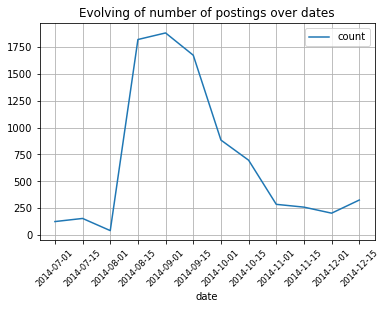

In [46]:
# plt.figure(figsize=(30, 6), dpi=80)
x_ = tweets_count['date'].to_list()
tweets_count.plot(x ='date', y='count', kind = 'line')
plt.xticks(range(len(x_)), x_, size='small', rotation=45)
plt.grid(True)
plt.title("Evolving of number of postings over dates")
plt.show()

### 2.2.2 Top 5 popular hashtag topics - popularity change over the dates

In [47]:
hashtag = []
tweets = tweets.reset_index()
tweets = tweets.drop(columns='index')
for i in range(tweets.shape[0]):
    s = tweets['Text'][i].lower()
    h = re.findall(r"#(\w+)", s)
    hashtag = hashtag + h

In [48]:
pd.Series(hashtag).value_counts().head(20)

icebucketchallenge       2845
als                       157
alsicebucketchallenge      60
strikeoutals               41
mnd                        18
feelingnuts                17
begoodbesocial             16
262acasa                   13
voteaustinmahone           13
vip                        13
marketing                  13
rko                        12
ice                        12
papst                      12
1                          11
taufe                      11
43                         10
socialmedia                10
yr                          9
orangeroom                  9
dtype: int64

<AxesSubplot:title={'center':'Hashtag Frequency'}>

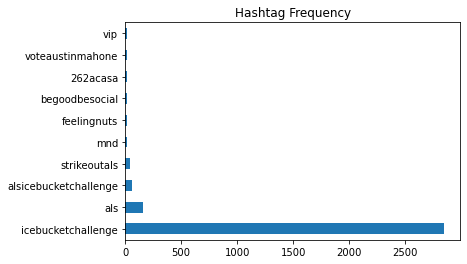

In [49]:
pd.Series(hashtag).value_counts()[:10].plot(kind='barh',title='Hashtag Frequency')

In [50]:
# top 5 hashtags
head = ['#icebucketchallenge', '#als', '#alsicebucketchallenge', '#strikeoutals','#mnd']

In [51]:
time = list(tweets['date'].unique())
time

['2014-07-01',
 '2014-07-15',
 '2014-08-01',
 '2014-08-15',
 '2014-09-01',
 '2014-09-15',
 '2014-10-01',
 '2014-10-15',
 '2014-11-01',
 '2014-11-15',
 '2014-12-01',
 '2014-12-15']

In [52]:
# create bundle text for each date
bundle = []
for i in time:
    select = tweets.loc[tweets['date'] == i]
    select = select.reset_index().drop(columns='index')
    text = ''
    for j in range(select.shape[0]):
        text = text+' '+select['Text'][j]
    bundle.append(text)

In [53]:
# count hashtag frequency for each bundle
import numpy as np
big_count=[]
for i in bundle:
    count = []
    for k in head:
        val = i.count(k)
        count.append(val)
    big_count.append(count)

big_count = pd.DataFrame(big_count)
big_count.set_axis(head,axis=1,inplace=True)
big_count.insert(loc=0, column='Time', value=time)
big_count

,Time,#icebucketchallenge,#als,#alsicebucketchallenge,#strikeoutals,#mnd
0,2014-07-01,82,0,0,0,0
1,2014-07-15,102,0,0,0,0
2,2014-08-01,14,0,0,6,0
3,2014-08-15,681,124,24,24,5
4,2014-09-01,699,45,20,3,2
5,2014-09-15,641,40,4,3,5
6,2014-10-01,269,9,5,2,5
7,2014-10-15,157,9,4,0,1
8,2014-11-01,68,3,0,2,0
9,2014-11-15,50,0,0,1,2


<AxesSubplot:xlabel='Time'>

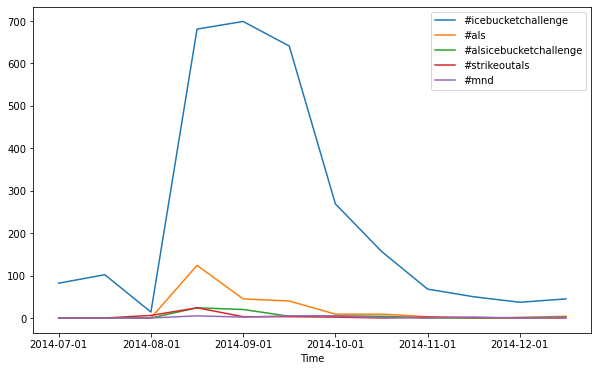

In [54]:
big_count.set_index('Time').plot(figsize=(10,6))

In [55]:
# for hashtag, count by date
h1 = tweets[tweets['icebucketchallenge'] == 1]
tweets_count_h1 = h1.groupby(['date'])['icebucketchallenge'].count().reset_index()

h2 = tweets[tweets['als'] == 1]
tweets_count_h2 = h2.groupby(['date'])['als'].count().reset_index()

h3 = tweets[tweets['alsicebucketchallenge'] == 1]
tweets_count_h3 = h3.groupby(['date'])['alsicebucketchallenge'].count().reset_index()

h4 = tweets[tweets['strikeoutals'] == 1]
tweets_count_h4 = h4.groupby(['date'])['strikeoutals'].count().reset_index()

h5 = tweets[tweets['mnd'] == 1]
tweets_count_h5 = h5.groupby(['date'])['mnd'].count().reset_index()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

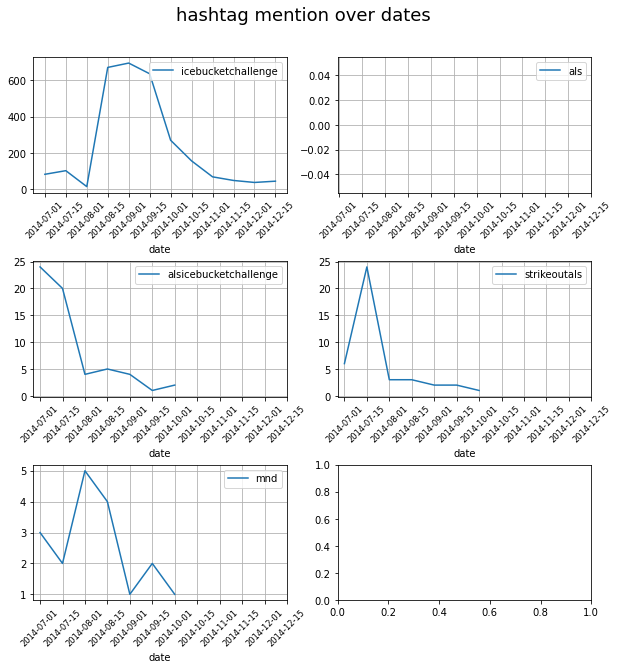

In [56]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("hashtag mention over dates", fontsize=18, y=0.95)

x_tick = tweets_count_h1['date'].to_list()

tweets_count_h1.plot(x ='date', y='icebucketchallenge', kind = 'line', ax=plt.subplot(3, 2, 1))
plt.xticks(range(len(x_tick)), x_tick, size='small', rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
tweets_count_h2.plot(x ='date', y='als', kind = 'line', ax=plt.subplot(3, 2, 2))
plt.xticks(range(len(x_tick)), x_tick, size='small', rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
tweets_count_h3.plot(x ='date', y='alsicebucketchallenge', kind = 'line', ax=plt.subplot(3, 2, 3))
plt.xticks(range(len(x_tick)), x_tick, size='small', rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
tweets_count_h4.plot(x ='date', y='strikeoutals', kind = 'line', ax=plt.subplot(3, 2, 4))
plt.xticks(range(len(x_tick)), x_tick, size='small', rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
tweets_count_h5.plot(x ='date', y='mnd', kind = 'line', ax=plt.subplot(3, 2, 5))
plt.xticks(range(len(x_tick)), x_tick, size='small', rotation=45)
plt.grid(True)
plt.legend(loc='upper right')

plt.plot

### 2.2.3 Comparison of tweets under different topics (ALS, charity, or merely the challenge event)

Did the ice bucket challeng provoke people's awareness of the disease (mentioned ALS) or increase people's willingness to donate to charities? 

#### 2.2.3.1 numbers of tweets under each topics
How many of the tweets were merely talking about the challenge but showed no care to the ALS or chairty topics?

tweets that mentioned ALS: 91 
tweets that mentioned charity: 230 
tweets that only talked about the challenge: 8016 
tweets that mentioned ALS AND charity: 19 



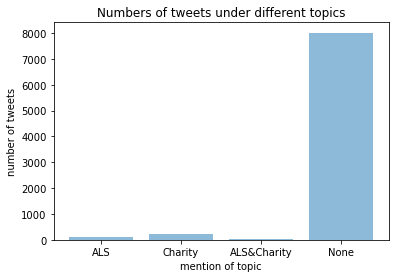

In [57]:
ALS_only = tweets[(tweets['ALS_mention'] == 1) & (tweets['charity_mention'] == 0)]
charity_only = tweets[(tweets['ALS_mention'] == 0) & (tweets['charity_mention'] == 1)]
challenge_only = tweets[(tweets['ALS_mention'] == 0) & (tweets['charity_mention'] == 0)]
ALS_and_charity = tweets[(tweets['ALS_mention'] == 1) & (tweets['charity_mention'] == 1)]

print("tweets that mentioned ALS:",str(len(ALS_only)),"\n"+"tweets that mentioned charity:",str(len(charity_only)),"\n"+"tweets that only talked about the challenge:",str(len(challenge_only)),"\n"+"tweets that mentioned ALS AND charity:",str(len(ALS_and_charity)),"\n")


objects = ('ALS', 'Charity', 'ALS&Charity', 'None')
y_pos = np.arange(len(objects))
counting = [len(ALS_only), len(charity_only), len(ALS_and_charity), len(challenge_only)]

plt.bar(y_pos, counting, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('number of tweets')
plt.xlabel('mention of topic')
plt.title('Numbers of tweets under different topics')

plt.show()

#### 2.2.3.2 Average number of users mentioned of tweets under each topics
Are tweets mentioning ALS or charity topics more interactivable (i.e. mentioned more users)?

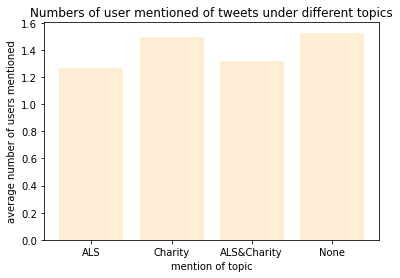

In [58]:
# check average number of users mentioned of tweets under different topics
ALS_only_users = ALS_only['num_users_mentioned'].mean()
charity_only_users = charity_only['num_users_mentioned'].mean()
ALS_and_charity_users = ALS_and_charity['num_users_mentioned'].mean()
challenge_only_users = challenge_only['num_users_mentioned'].mean()


objects1 = ('ALS', 'Charity', 'ALS&Charity', 'None')
y_pos1 = np.arange(len(objects1))
counting1 = [ALS_only_users, charity_only_users, ALS_and_charity_users, challenge_only_users]

plt.bar(y_pos1, counting1, align='center', alpha=0.5, color='navajowhite')
plt.xticks(y_pos1, objects1)
plt.ylabel('average number of users mentioned')
plt.xlabel('mention of topic')
plt.title('Numbers of user mentioned of tweets under different topics')

plt.show()

In [59]:
print(ALS_only_users, charity_only_users, ALS_and_charity_users, challenge_only_users)

1.2637362637362637 1.4956521739130435 1.3157894736842106 1.526571856287425


#### 2.2.3.3 Average sentiment scores of tweets under each topic
Did tweets mentioning ALS/charity represent a higher or lower average sentiment? What were users' attitude towards the topics?

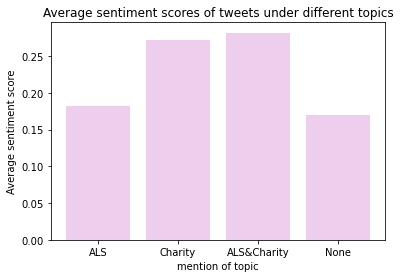

In [60]:
# visualize average sentiment scores of tweets under different topics
ALS_only_sent = ALS_only['compound'].mean()
charity_only_sent = charity_only['compound'].mean()
ALS_and_charity_sent = ALS_and_charity['compound'].mean()
challenge_only_sent = challenge_only['compound'].mean()


objects2 = ('ALS', 'Charity', 'ALS&Charity', 'None')
y_pos2 = np.arange(len(objects2))
counting2 = [ALS_only_sent, charity_only_sent, ALS_and_charity_sent, challenge_only_sent]

plt.bar(y_pos2, counting2, align='center', alpha=0.5, color='plum')
plt.xticks(y_pos2, objects2)
plt.ylabel('Average sentiment score')
plt.xlabel('mention of topic')
plt.title('Average sentiment scores of tweets under different topics')

plt.show()

In [61]:
print(ALS_only_sent, charity_only_sent, ALS_and_charity_sent, challenge_only_sent)

0.18234285714285703 0.2726821739130432 0.28201052631578954 0.16927521207583895


### 2.2.4 Sentiment Visualization

In [62]:
kk = tweets_processed['sentiment_type'].value_counts()
print('Percentage of positive tweets:',kk['positive']/tweets_processed.shape[0])
print('Percentage of neutral tweets:',kk['neutral']/tweets_processed.shape[0])
print('Percentage of negative tweets:',kk['negative']/tweets_processed.shape[0])

Percentage of positive tweets: 0.6598851124940163
Percentage of neutral tweets: 0.22881761608425083
Percentage of negative tweets: 0.11129727142173289


Text(0.5, 1.0, 'Sentiment Count')

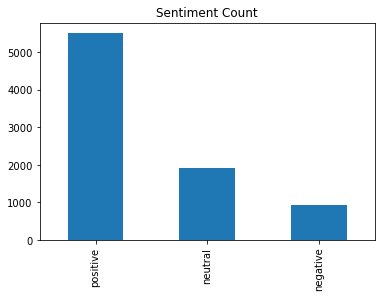

In [63]:
tweets_processed['sentiment_type'].value_counts().plot(kind='bar')
plt.title("Sentiment Count")

In [64]:
time = list(tweets['date'].unique())

In [65]:
# create bundle text for each date
sentiment_count = []
for i in time:
    select = tweets.loc[tweets['date'] == i]
    select = select.reset_index().drop(columns='index')
    positive = select.loc[select['sentiment_type']=='positive'].shape[0]
    neutral = select.loc[select['sentiment_type']=='neutral'].shape[0]
    negative = select.loc[select['sentiment_type']=='negative'].shape[0]
    little_count = [positive,neutral,negative]
    sentiment_count.append(little_count)
sentiment_count

[[88, 32, 7],
 [110, 35, 11],
 [36, 5, 2],
 [1333, 325, 160],
 [1181, 562, 136],
 [1045, 479, 148],
 [586, 209, 89],
 [398, 121, 178],
 [210, 60, 17],
 [203, 33, 25],
 [150, 27, 28],
 [174, 24, 129]]

In [66]:
sentiment_count = pd.DataFrame(sentiment_count)
sentiment_count.set_axis(['positive','neutral','negative'],axis=1,inplace=True)
sentiment_count.insert(loc=0, column='Time', value=time)
sentiment_count

,Time,positive,neutral,negative
0,2014-07-01,88,32,7
1,2014-07-15,110,35,11
2,2014-08-01,36,5,2
3,2014-08-15,1333,325,160
4,2014-09-01,1181,562,136
5,2014-09-15,1045,479,148
6,2014-10-01,586,209,89
7,2014-10-15,398,121,178
8,2014-11-01,210,60,17
9,2014-11-15,203,33,25


Text(0.5, 1.0, 'Tweets Sentiment Overtime')

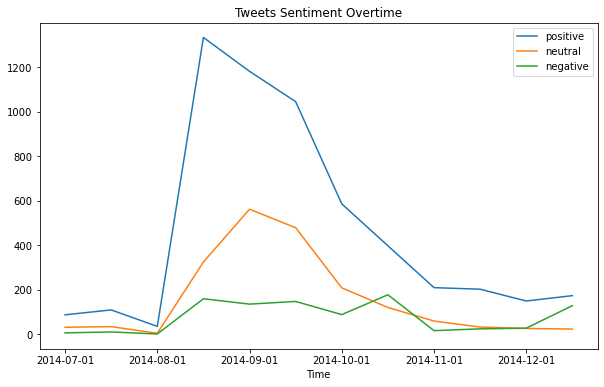

In [67]:
sentiment_count.set_index('Time').plot(figsize=(10,6))
plt.title('Tweets Sentiment Overtime')

### 2.2.5 Two sided T-test to examine if mentions of ALS/charity topics influence sentiments of the tweets

In [68]:
# Two sided T-test to examine if the average sentiment scores of tweets that 
# did/ did not mention ALS or charity topics are significantly different.

from scipy import stats
alpha = 0.05

ALS_mentioned_sent = tweets[tweets['ALS_mention']==1]['compound'].to_list()
ALS_not_mentioned_sent = tweets[tweets['ALS_mention']==0]['compound'].to_list()

charity_mentioned_sent = tweets[tweets['charity_mention']==1]['compound'].to_list()
charity_not_mentioned_sent = tweets[tweets['charity_mention']==0]['compound'].to_list()

# ALS mention
A_t_value, A_p_value = stats.ttest_ind(ALS_mentioned_sent, ALS_not_mentioned_sent, equal_var=False)
print('For comparison of tweets that did or did not mention ALS related keywords:')
print('Test statistic is %f'%float("{:.6f}".format(A_t_value)))
print('p-value for two tailed test is %f'%A_p_value)
if A_p_value<=alpha:
    print('reject null hypothesis, μ1 != μ2')
else:
    print('not reject null hypothesis. μ1 = μ2 \n')


# charity mention
C_t_value, C_p_value = stats.ttest_ind(charity_mentioned_sent, charity_not_mentioned_sent, equal_var=False)
print('For comparison of tweets that did or did not mention charity related keywords:')
print('Test statistic is %f'%float("{:.6f}".format(C_t_value)))
print('p-value for two tailed test is %f'%C_p_value)
if C_p_value<=alpha:
    print('reject null hypothesis, μ1 != μ2')
else:
    print('not reject null hypothesis. μ1 = μ2 \n')

For comparison of tweets that did or did not mention ALS related keywords:
Test statistic is 0.728556
p-value for two tailed test is 0.467809
not reject null hypothesis. μ1 = μ2 

For comparison of tweets that did or did not mention charity related keywords:
Test statistic is 4.224740
p-value for two tailed test is 0.000033
reject null hypothesis, μ1 != μ2


In [69]:
print(tweets.groupby('ALS_mention')['compound'].mean(), "\n")
print(tweets.groupby('charity_mention')['compound'].mean(), "\n")

print("The average sentiments of tweets that did mention charity/donation is statistically significantly higher. " )

ALS_mention
0    0.172159
1    0.199558
Name: compound, dtype: float64 

charity_mention
0    0.169422
1    0.273394
Name: compound, dtype: float64 

The average sentiments of tweets that did mention charity/donation is statistically significantly higher. 


In [70]:
ALS_mentioned_user = tweets[tweets['ALS_mention']==1]['num_users_mentioned'].to_list()
ALS_not_mentioned_user = tweets[tweets['ALS_mention']==0]['num_users_mentioned'].to_list()

charity_mentioned_user = tweets[tweets['charity_mention']==1]['num_users_mentioned'].to_list()
charity_not_mentioned_user = tweets[tweets['charity_mention']==0]['num_users_mentioned'].to_list()


# ALS mention
AA_t_value, AA_p_value = stats.ttest_ind(ALS_mentioned_user, ALS_not_mentioned_user, equal_var=False)
print('For comparison of tweets that did or did not mention ALS related keywords:')
print('Test statistic is %f'%float("{:.6f}".format(AA_t_value)))
print('p-value for two tailed test is %f'%AA_p_value)
if AA_p_value<=alpha:
    print('reject null hypothesis, μ1 != μ2 \n')
else:
    print('not reject null hypothesis. μ1 = μ2 \n')


# charity mention
CC_t_value, CC_p_value = stats.ttest_ind(charity_mentioned_user, charity_not_mentioned_user, equal_var=False)
print('For comparison of tweets that did or did not mention charity related keywords:')
print('Test statistic is %f'%float("{:.6f}".format(CC_t_value)))
print('p-value for two tailed test is %f'%CC_p_value)
if CC_p_value<=alpha:
    print('reject null hypothesis, μ1 != μ2 \n')
else:
    print('not reject null hypothesis. μ1 = μ2 \n')

For comparison of tweets that did or did not mention ALS related keywords:
Test statistic is -4.826109
p-value for two tailed test is 0.000004
reject null hypothesis, μ1 != μ2 

For comparison of tweets that did or did not mention charity related keywords:
Test statistic is -0.824081
p-value for two tailed test is 0.410627
not reject null hypothesis. μ1 = μ2 



## 2.3 Topic Modeling

### 2.3.1 Wordcloud for initial visualization of topics

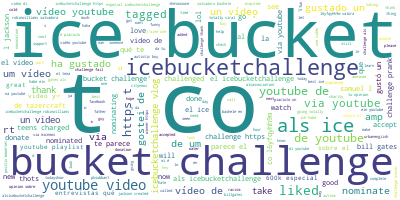

In [71]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tweets['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_file('wordcloud.png')
wordcloud.to_image()

In [72]:
# %pip install gensim

In [73]:
import gensim
from gensim.utils import simple_preprocess

stop_words = stopwords.words('english')
stop_words.extend([ 'de','el','un','la'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = tweets.Text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

In [74]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [75]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"co" + 0.051*"challenge" + 0.048*"ice" + 0.047*"bucket" + '
  '0.046*"http" + 0.012*"youtube" + 0.011*"video" + 0.011*"via" + 0.010*"als" '
  '+ 0.007*"https"'),
 (1,
  '0.044*"co" + 0.040*"http" + 0.019*"challenge" + 0.018*"ice" + '
  '0.017*"bucket" + 0.011*"als" + 0.008*"video" + 0.005*"te" + 0.005*"que" + '
  '0.005*"da"'),
 (2,
  '0.048*"co" + 0.038*"http" + 0.033*"ice" + 0.031*"bucket" + '
  '0.030*"challenge" + 0.018*"youtube" + 0.017*"video" + 0.011*"als" + '
  '0.008*"https" + 0.006*"ha"'),
 (3,
  '0.056*"http" + 0.055*"co" + 0.044*"ice" + 0.044*"bucket" + '
  '0.043*"challenge" + 0.016*"via" + 0.016*"youtube" + 0.014*"video" + '
  '0.014*"als" + 0.008*"tagged"'),
 (4,
  '0.068*"challenge" + 0.066*"bucket" + 0.065*"ice" + 0.050*"co" + '
  '0.046*"http" + 0.032*"youtube" + 0.025*"als" + 0.025*"video" + '
  '0.011*"liked" + 0.008*"via"')]


In [76]:
# %pip install pyLDAvis

In [77]:
import os
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

for i in [3]:  # we initially test on number of topics = 3,4,5,6,7,8,9,10 and find 3 to be the optimal number
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i)
    # Visualize the topics
    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join('./final code')
    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yourself
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './topic-modelling'+ str(i) +'.html')
LDAvis_prepared

D:\anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.054733  0.013558       1        1  40.759963
1     -0.013051 -0.045658       2        1  34.202449
0     -0.041682  0.032100       3        1  25.037588, topic_info=           Term         Freq        Total Category  logprob  loglift
6           ice  4501.000000  4501.000000  Default  30.0000  30.0000
2108     gostei   257.000000   257.000000  Default  29.0000  29.0000
2110         um   269.000000   269.000000  Default  28.0000  28.0000
6888       vlog   186.000000   186.000000  Default  27.0000  27.0000
1        bucket  4473.000000  4473.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
158     youtube   269.817537  1871.039620   Topic3  -4.4849  -0.5517
480       liked   105.579229   493.845328   Topic3  -5.4232  -0.1580
70    nominated    49.720922   142.194407   Topic3  -6.1762   0.3340
207         amp    61.098355   264.314087   Topic3  -5.9701  -0.0799
23     nominate    44.639433   252.872371   Topic3  -6.2840  -0.3495

[244 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
10757      3  0.658029        ala
246        1  0.417134        als
246        2  0.418454        als
246        3  0.164346        als
207        1  0.529673        amp
...      ...       ...        ...
158        1  0.625321    youtube
158        2  0.230888    youtube
158        3  0.144305    youtube
12022      2  0.897578  zaynmalik
3369       1  0.963444         zn

[412 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# 3. Network Analysis

### 3.1 Import data and packages

In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
#!pip install decorator==5.0.9


In [79]:
df_value_counts = pd.read_csv("mentioned_users_counts.csv")

In [80]:
df_value_counts

,username,mentioned_counts
0,YouTube,2285
1,TazerCraft,192
2,jamesbq9,153
3,ALSIceBucketV,147
4,PearlOnVelvet,112
...,...,...
18780,CreepaKingBrian,1
18781,jensenclan88,1
18782,MrBenBrown,1
18783,rpuig205,1


In [81]:
# read data
data = pd.read_csv("users_interactions.csv")
data

,user_posting_tweet,user_mentioned,Type
0,Steve_DiMeglio,Keegan_Bradley,Non-tweet
1,AmyOlsonGolf,AmyOlsonGolf,Tweet
2,eddiefoohc,eddiefoohc,Tweet
3,stevenaumann,antoniovilla9,Non-tweet
4,stevenaumann,Knaumann93,Non-tweet
...,...,...,...
27952,PlayJarizm,SamuelLJackson,Non-tweet
27953,Jingrassia,thetomzone,Non-tweet
27954,Jingrassia,micnews,Non-tweet
27955,Muzik_Head_,Muzik_Head_,Tweet


In [82]:
# import library for network calculation
import networkx as nx
G = nx.DiGraph()

### 3.2 Centrality indexes calculation

In [83]:
# create pairs for interactions between users
lst=list()
for (a,b) in zip(data["user_posting_tweet"], data["user_mentioned"]):
    lst.append((a,b))
G.add_edges_from(lst)

In [84]:
# closeness centrality calculation
closeness_centrality=pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index').reset_index()
closeness_centrality = closeness_centrality.rename(columns={0: 'closeness'})
closeness_centrality

,index,closeness
0,Steve_DiMeglio,0.000000
1,Keegan_Bradley,0.000119
2,AmyOlsonGolf,0.000000
3,eddiefoohc,0.000000
4,stevenaumann,0.000000
...,...,...
25264,faceitiworkhard,0.000000
25265,MS_CRM_,0.000000
25266,PlayJarizm,0.000000
25267,Jingrassia,0.000000


In [85]:
# degree centrality calculation
degree_centrality=pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index').reset_index()
degree_centrality = degree_centrality.rename(columns={0: 'degree'})
degree_centrality

,index,degree
0,Steve_DiMeglio,0.000040
1,Keegan_Bradley,0.000119
2,AmyOlsonGolf,0.000079
3,eddiefoohc,0.000079
4,stevenaumann,0.000079
...,...,...
25264,faceitiworkhard,0.000079
25265,MS_CRM_,0.000079
25266,PlayJarizm,0.000040
25267,Jingrassia,0.000079


In [86]:
degree_centrality.degree.max()

0.07966598068703498

Warning: the following line will take 15-20 minutes to run.

In [87]:
# betweeness centrality calculation
betweenness_centrality=pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index').reset_index()
betweenness_centrality = betweenness_centrality.rename(columns={0: 'betweenness'})
betweenness_centrality

,index,betweenness
0,Steve_DiMeglio,0.0
1,Keegan_Bradley,0.0
2,AmyOlsonGolf,0.0
3,eddiefoohc,0.0
4,stevenaumann,0.0
...,...,...
25264,faceitiworkhard,0.0
25265,MS_CRM_,0.0
25266,PlayJarizm,0.0
25267,Jingrassia,0.0


### 3.3 Concatenation to calculate popularity score

In [88]:
#degree=[]
#mentioned=[]
#for i in name:
#  degree.append(degree_centrality.loc[degree_centrality['index'] == i].degree.values.tolist()[0])
#  mentioned.append(df_value_counts.loc[df_value_counts['username'] == i].mentioned_counts.values.tolist()[0])

In [89]:
from sklearn.preprocessing import StandardScaler,Normalizer

# read already scraped data directly from csv we provided
score_final=pd.read_csv("score_prep.csv")
score_final
# we want to filter out users who are mentioned less than 3 times
#score_final = score_final.drop(score_final[score_final.mentioned < 3].index)

,Username,followers,listed_count,Language,language
0,YouTube,74781280,79880,NaN,NaN
1,TazerCraft,171420,76,NaN,NaN
2,jamesbq9,81,179,NaN,NaN
3,ALSIceBucketV,1,0,NaN,NaN
4,PearlOnVelvet,44995,277,NaN,NaN
...,...,...,...,...,...
18330,ghughesy88,347,11,NaN,NaN
18331,InfluenceGuy,1852,94,NaN,NaN
18332,eralvarez75,413,1,NaN,NaN
18333,greatgrace84,529,35,NaN,NaN


In [90]:
popularity = pd.merge(left=df_value_counts, right=score_final, left_on='username', right_on='Username')
popularity

,username,mentioned_counts,Username,followers,listed_count,Language,language
0,YouTube,2285,YouTube,74781280,79880,NaN,NaN
1,TazerCraft,192,TazerCraft,171420,76,NaN,NaN
2,jamesbq9,153,jamesbq9,81,179,NaN,NaN
3,ALSIceBucketV,147,ALSIceBucketV,1,0,NaN,NaN
4,PearlOnVelvet,112,PearlOnVelvet,44995,277,NaN,NaN
...,...,...,...,...,...,...,...
18330,CreepaKingBrian,1,CreepaKingBrian,194,7,NaN,NaN
18331,jensenclan88,1,jensenclan88,15,0,NaN,NaN
18332,MrBenBrown,1,MrBenBrown,229746,651,NaN,NaN
18333,rpuig205,1,rpuig205,533,5,NaN,NaN


In [91]:
popularity.drop(['Username','Language','language'], axis=1,inplace=True)
popularity

,username,mentioned_counts,followers,listed_count
0,YouTube,2285,74781280,79880
1,TazerCraft,192,171420,76
2,jamesbq9,153,81,179
3,ALSIceBucketV,147,1,0
4,PearlOnVelvet,112,44995,277
...,...,...,...,...
18330,CreepaKingBrian,1,194,7
18331,jensenclan88,1,15,0
18332,MrBenBrown,1,229746,651
18333,rpuig205,1,533,5


In [92]:
# standardization
X_score = popularity.iloc[:,1:]
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_score)
# result of standardization
df_final = pd.DataFrame(X_norm,columns=["mentioned_counts","followers","listed_count"])
df_final["username"]=popularity["username"]
df_final

,mentioned_counts,followers,listed_count,username
0,132.631401,23.557895,11.163698,YouTube
1,11.065584,-0.034773,-0.092028,TazerCraft
2,8.800382,-0.088952,-0.077501,jamesbq9
3,8.451890,-0.088978,-0.102747,ALSIceBucketV
4,6.419017,-0.074750,-0.063679,PearlOnVelvet
...,...,...,...,...
18330,-0.028095,-0.088917,-0.101760,CreepaKingBrian
18331,-0.028095,-0.088973,-0.102747,jensenclan88
18332,-0.028095,-0.016329,-0.010929,MrBenBrown
18333,-0.028095,-0.088809,-0.102042,rpuig205


In [93]:
ratio = 1.0/(0.182173+0.114590+0.111455)
adjust = 0.05
w_list = 0.182173*ratio+adjust
w_follow = 0.111455*ratio
w_mention = 0.114590*ratio-adjust

# calculate popularity score for each user
rate=[]
for i in range(len(df_final)):
    rate.append(w_mention*df_final["mentioned_counts"][i]
                +w_follow*df_final["followers"][i]
                +w_list*df_final["listed_count"][i])
rate

[42.571216013132144,
 2.4977530429778887,
 1.967570041864347,
 1.8746342166162022,
 1.428907340865823,
 1.4469027416959654,
 1.2224745339719658,
 1.2405559255961787,
 1.157392770681421,
 1.1418321648850482,
 1.0438368682451946,
 0.883314489428879,
 0.8830361532749157,
 0.8830346855753819,
 2.3746865458725153,
 0.6820376985333508,
 0.6820102951428734,
 0.6331568526544471,
 0.950192304332893,
 9.645737123549457,
 14.117699434400958,
 0.5750708601425957,
 0.5480350738460174,
 0.5748356499775475,
 9.507307559731062,
 0.4275234175889054,
 0.4488192293138208,
 3.298256283557119,
 0.37463525505345907,
 0.3475288790248716,
 0.34703566941651887,
 0.3763949463072765,
 0.6298248316502184,
 2.3328239272887186,
 1.4777472332070103,
 2.4040660324368575,
 0.1996506622941849,
 6.0667183588843345,
 0.19964082007378156,
 1.285699433622032,
 0.1862356451283732,
 0.3423101345389674,
 0.17306564744944544,
 1.433586002712838,
 0.15943496478742644,
 0.16876638852279,
 0.15584296177076062,
 2.282132317436022,

In [94]:
# get top 100 influencers
df_final["score"]=rate
df_final=df_final.sort_values(by="score",ascending=False).reset_index()
popularity = df_final.head(100)
popularity=popularity.drop(columns="index")
popularity

,mentioned_counts,followers,listed_count,username,score
0,0.436561,36.070269,75.859157,justinbieber,47.595086
1,132.631401,23.557895,11.163698,YouTube,42.571216
2,0.494643,41.471295,31.233992,BarackObama,26.937255
3,0.088069,26.630511,28.610891,ladygaga,21.489752
4,-0.028095,16.518554,30.240351,nytimes,19.510746
...,...,...,...,...,...
95,0.029987,4.138312,3.170558,BillClinton,2.710228
96,-0.028095,3.398110,3.523446,Starbucks,2.669857
97,-0.028095,3.232700,3.577888,Microsoft,2.651713
98,-0.028095,3.126190,3.613572,Michael5SOS,2.640341


In [95]:
popularity.head(10)

,mentioned_counts,followers,listed_count,username,score
0,0.436561,36.070269,75.859157,justinbieber,47.595086
1,132.631401,23.557895,11.163698,YouTube,42.571216
2,0.494643,41.471295,31.233992,BarackObama,26.937255
3,0.088069,26.630511,28.610891,ladygaga,21.489752
4,-0.028095,16.518554,30.240351,nytimes,19.510746
5,-0.028095,19.763019,27.158298,cnnbrk,18.867064
6,0.320397,34.342513,17.979559,katyperry,18.372998
7,0.088069,28.493835,15.919356,taylorswift13,15.700140
8,-0.028095,18.092014,21.632127,CNN,15.668393
9,0.029987,33.414015,13.158739,rihanna,15.660093


In [96]:
# LesTurnerALS is never mentioned/ appear in our scraped dataset
print("ALSCanada is one of the top influencers:",'ALSCanada' in popularity.username.tolist())
print("alsassociation is one of the top influencers:",'alsassociation' in popularity.username.tolist())
print("LesTurnerALS is one of the top influencers: False")

ALSCanada is one of the top influencers: False
alsassociation is one of the top influencers: False
LesTurnerALS is one of the top influencers: False


### 3.4 Visualization

In [97]:
# list of top 100 influencers
top=popularity['username']

In [98]:
# create dataframe for visualization
viz=data[data['user_mentioned'].isin(top)]
viz=viz.reset_index(drop=True)
viz['Type']=np.where(viz['Type']=='Non-tweet',0,1)
viz

,user_posting_tweet,user_mentioned,Type
0,yasminadaus,YouTube,0
1,yasminadaus,YouTube,0
2,haunt3dWinGz,YouTube,0
3,ovrcome,BillClinton,0
4,DLifestyler1,KingJames,0
...,...,...,...
2749,EllieAfy,YouTube,0
2750,Cutiieex_,YouTube,0
2751,QueenYaYaYana,YouTube,0
2752,DasYouTuber,YouTube,0


In [99]:
# export dataframe
viz.to_csv("visualization.csv",index = False)

In [100]:
# list of top 10 influencers
top=popularity['username'][0:10]
# create dataframe for visualization
viz2=data[data['user_mentioned'].isin(top)]
viz2=viz2.reset_index(drop=True)
viz2['Type']=np.where(viz2['Type']=='Non-tweet',0,1)
viz2

,user_posting_tweet,user_mentioned,Type
0,yasminadaus,YouTube,0
1,yasminadaus,YouTube,0
2,haunt3dWinGz,YouTube,0
3,oodvit,YouTube,0
4,sherrieinprovo,YouTube,0
...,...,...,...
2317,EllieAfy,YouTube,0
2318,Cutiieex_,YouTube,0
2319,QueenYaYaYana,YouTube,0
2320,DasYouTuber,YouTube,0


In [101]:
viz2['weight'] = 1
viz2 = viz2.drop_duplicates()
viz2

,user_posting_tweet,user_mentioned,Type,weight
0,yasminadaus,YouTube,0,1
2,haunt3dWinGz,YouTube,0,1
3,oodvit,YouTube,0,1
4,sherrieinprovo,YouTube,0,1
5,shortguytim,YouTube,0,1
...,...,...,...,...
2317,EllieAfy,YouTube,0,1
2318,Cutiieex_,YouTube,0,1
2319,QueenYaYaYana,YouTube,0,1
2320,DasYouTuber,YouTube,0,1


In [102]:
import networkx as nx
G = nx.from_pandas_edgelist(viz2,source='user_posting_tweet',target='user_mentioned')#,edge_attr='weight')

D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(


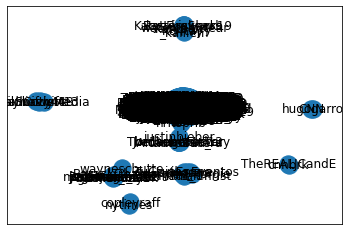

In [103]:
nx.draw_networkx(G)

In [104]:
# !pip install pyvis

In [105]:
import pyvis
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(G)
net.show("example.html")
